# Reward Training Analysis

In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from rt_extension import Reward_Training
from pathlib import Path

In [2]:
# NAc
nac_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc"
# nac_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\NAc"

# nac_experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Reward Training/Reward Training/Reward_Training/Day1/NAc"
# nac_experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Reward Training/Reward Training/Reward_Training/Day10/NAc"
nac_color = '#15616F'

# mPFC
mpfc_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC"
# mpfc_experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day10\mPFC"

# mpfc_experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Reward Training/Reward Training/Reward_Training/Day1/mPFC"
# mpfc_experiment_path = "/Users/naylajimenez/Downloads/papers/dopamine/cohort-1-2/allcohorts/Reward Training/Reward Training/Reward_Training/Day10/mPFC"
mpfc_color = '#FFAF00'

# NAc: #15616F
# mPFC: #FFAF00
save_path = r'graphs'
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\test"


In [3]:
nac_exp = Reward_Training(experiment_folder_path=nac_experiment_path, behavior_folder_path=None)
mpfc_exp = Reward_Training(experiment_folder_path=mpfc_experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc\n5-240901-064209\Notes.txt
read from t=0s to t=1681.56s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\NAc\n7-240901-115754\Notes.txt
read from t=0s to t=2008.26s
read from t=0s to t=3853.69s
read from t=0s to t=3853.69s
read from t=0s to t=3851.09s
read from t=0s to t=3851.09s
read from t=0s to t=3863.41s
read from t=0s to t=3863.41s
read from t=0s to t=3846.39s
read from t=0s to t=3846.39s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC\p1-240529-061914\Notes.txt
read from t=0s to t=1680.98s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Training\Combined\Day_1\mPFC\p2-240529-091204\Notes.txt
read from t=0s to t=1682.24s
Fo

Reward Training Processing - Create DA df and obtain DA metrics

In [4]:
def run_rtc_pipeline(exp, experiment_path):
    exp.rtc_processing()
    exp.create_base_df(experiment_path)
    exp.remove_specified_subjects()
    exp.extract_da_columns()
    exp.find_first_port_entry_after_sound_cue()
    # exp.compute_closest_port_offset(
    #     PE_column='first_PE_after_sound_cue',
    #     offset_column='filtered_port_entry_offset'
    # )

    # Choose either standard or EI DA
    # exp.compute_standard_DA()  # for all tones, calculate the standard DA response (-4s ->10s) for both tone and lick
    exp.compute_EI_DA()  # for all tones, calculate the event-induced DA response (-4s ->10s) for both tone and lick

    exp.compute_rtc_da_metrics()

run_rtc_pipeline(nac_exp, experiment_path=nac_experiment_path)
run_rtc_pipeline(mpfc_exp, experiment_path=mpfc_experiment_path)

Processing trial n5-240901-064209...
Processing trial n7-240901-115754...
Processing trial nn1-250124-052535...
Processing trial nn2-250124-052535...
Processing trial nn3-250124-064620...
Processing trial nn4-250124-064620...
Processing trial nn5-250124-111148...
Processing trial nn6-250124-111148...
Processing trial nn7-250124-122758...
Processing trial nn8-250124-122758...
Processing trial p1-240529-061914...
Processing trial p2-240529-091204...
Processing trial p3-240529-115040...
Processing trial p4-240529-142834...
Processing trial p5-240901-052302...
Processing trial p6-240901-080800...
Processing trial p7-240901-104150...
Processing trial p8-240901-131350...
Processing trial pp1-250124-083014...
Processing trial pp2-250124-083014...
Processing trial pp3-250124-095442...
Processing trial pp4-250124-095442...
Processing trial pp5-250124-134955...
Processing trial pp6-250124-134955...
Processing trial pp7-250124-150609...
Processing trial pp8-250124-150609...


# Group PSTH's

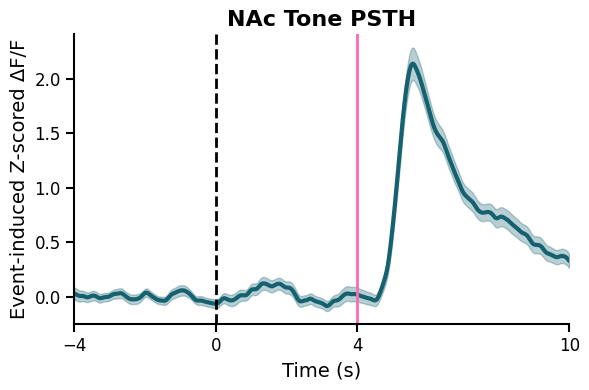

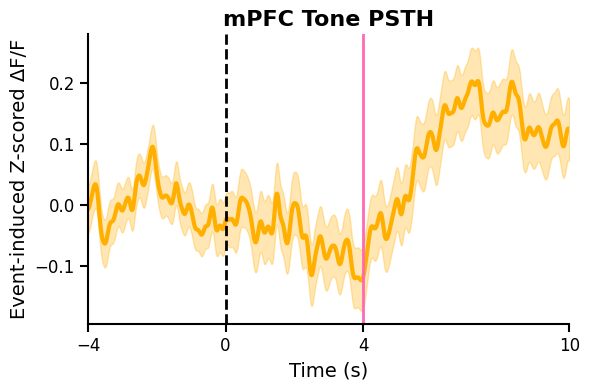

In [5]:
nac_exp.plot_group_PETH(event_type='Tone',brain_region='NAc', xlim=(-4,10), bin_size = 1)
mpfc_exp.plot_group_PETH(event_type='Tone',brain_region='mPFC', xlim=(-4,10), bin_size = 1)

## PSTH For first and last tones

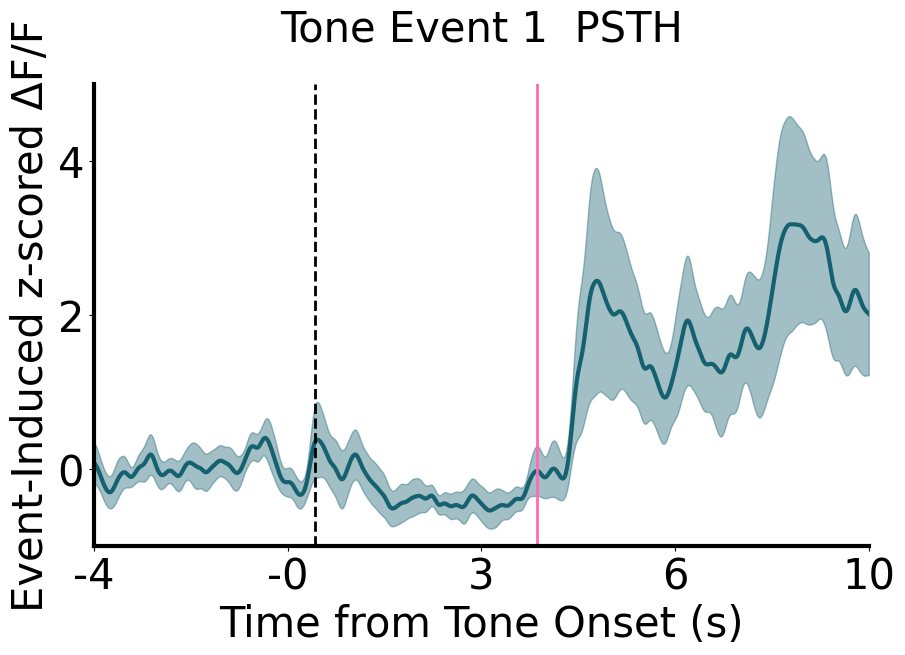

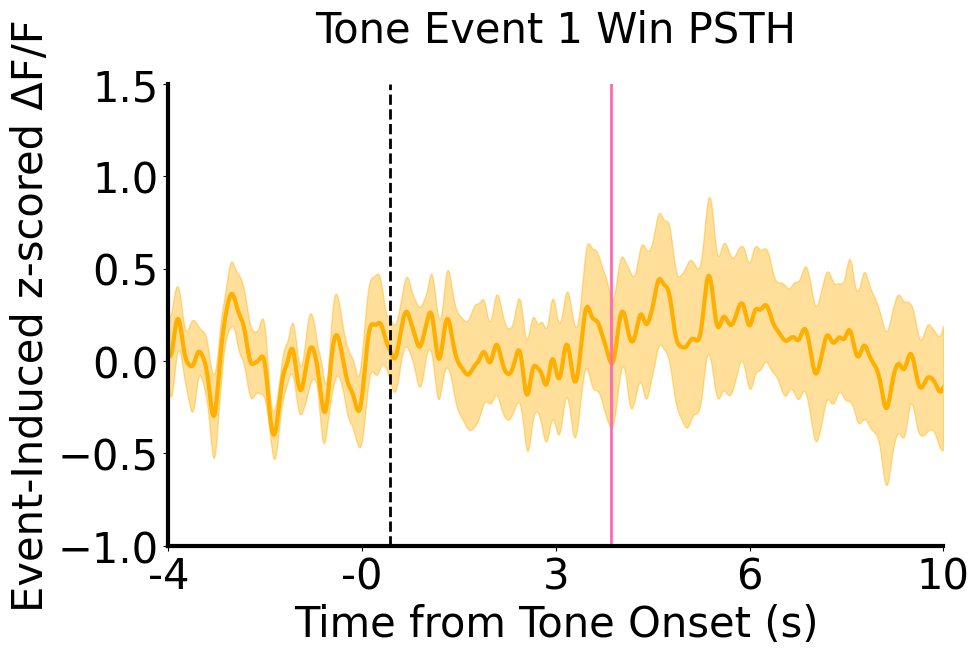

In [6]:
nac_exp.plot_specific_event_psth(event_type='Tone', 
                             event_index = 1, directory_path=None, 
                             brain_region='NAc', 
                             condition= '', y_min=-1, y_max=5, xlim=(-4,10))
mpfc_exp.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=save_path, brain_region='mPFC', y_min=-1, y_max=1.5,  
                                  xlim=(-4,10))

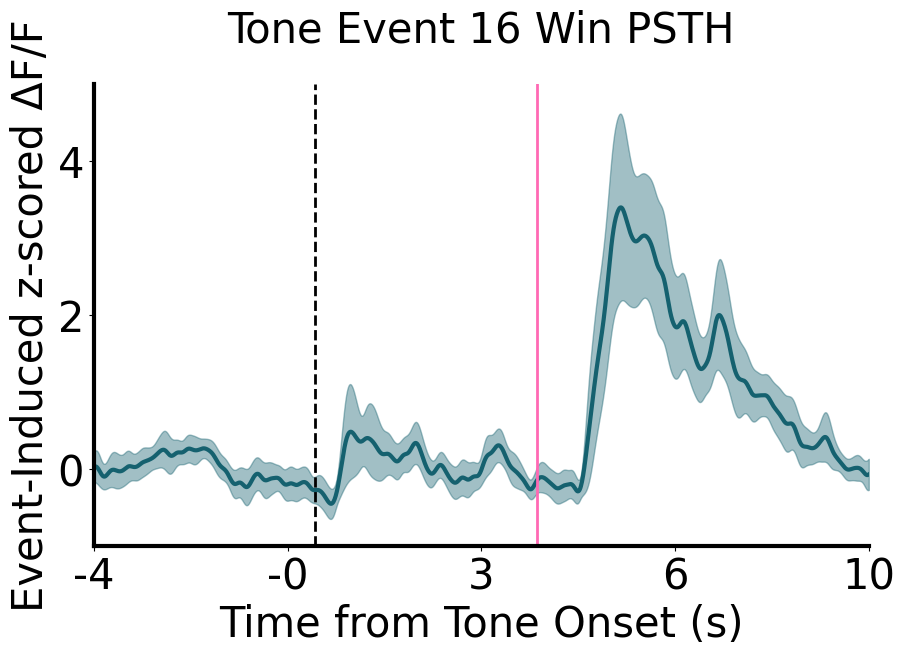

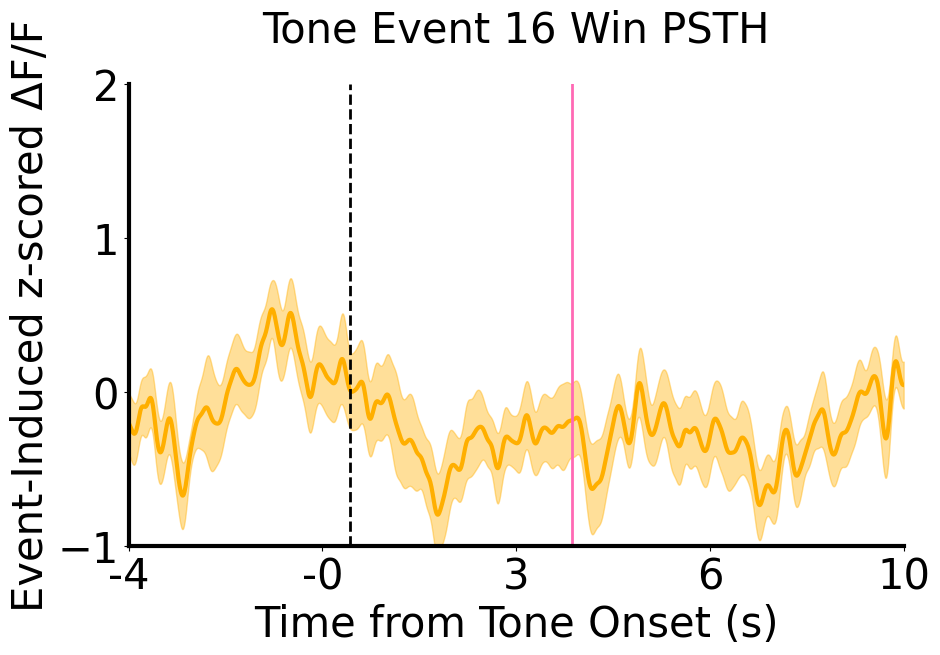

In [7]:
nac_exp.plot_specific_event_psth(event_type='Tone', event_index = 16, directory_path=None, brain_region='NAc', 
                                 y_min=-1, y_max=5, xlim=(-4,10))
mpfc_exp.plot_specific_event_psth(event_type='Tone', event_index = 16, directory_path=None, brain_region='mPFC', 
                                  y_min=-1, y_max=2, xlim=(-4,10))

Individual plots

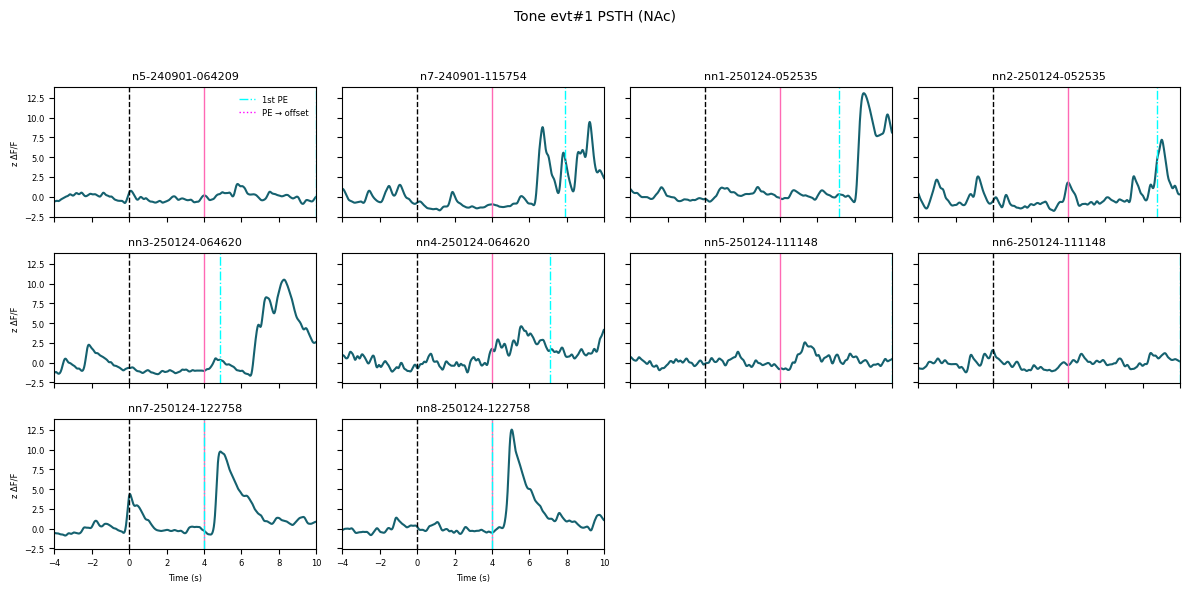

In [8]:
df = nac_exp.plot_PETH_index_grid(df=nac_exp.da_df.copy(),brain_region='NAc',event_type='Tone',event_index=1)

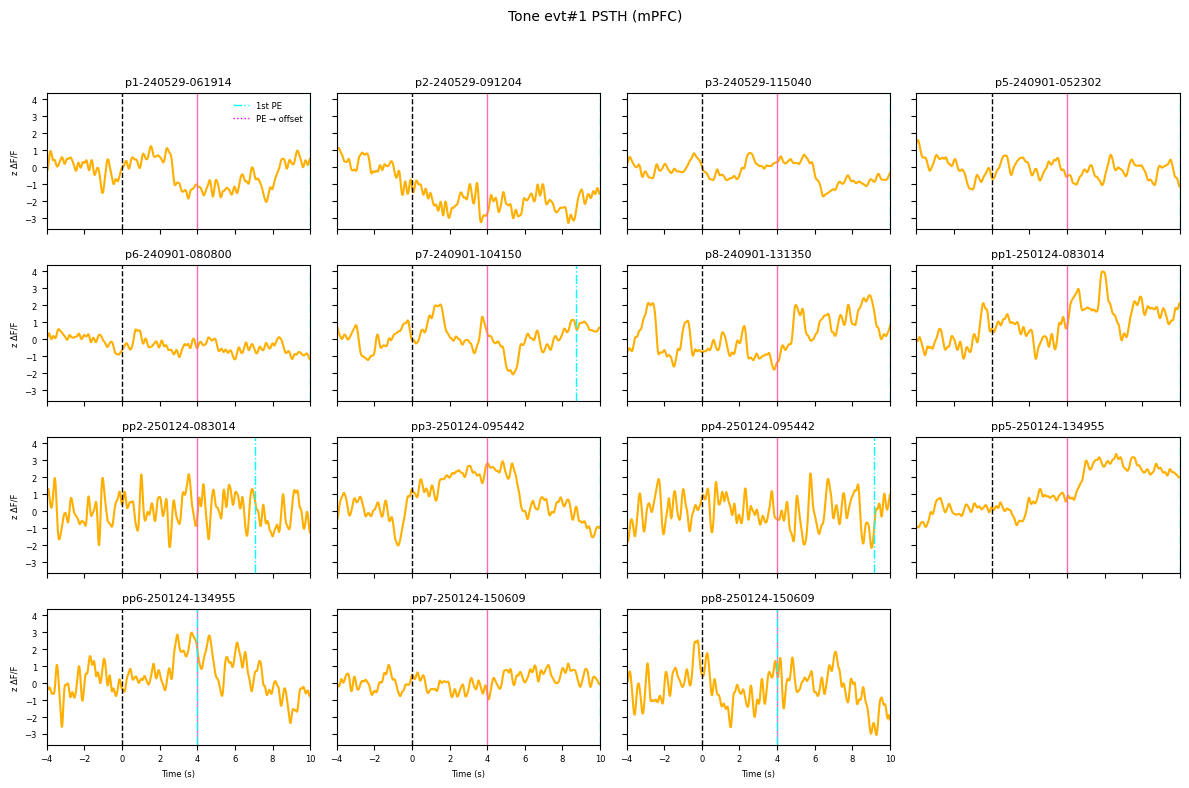

In [9]:
df = mpfc_exp.plot_PETH_index_grid(df=mpfc_exp.da_df.copy(),brain_region='mPFC',event_type='Tone',event_index=1)

## Heat maps

Grouped by event

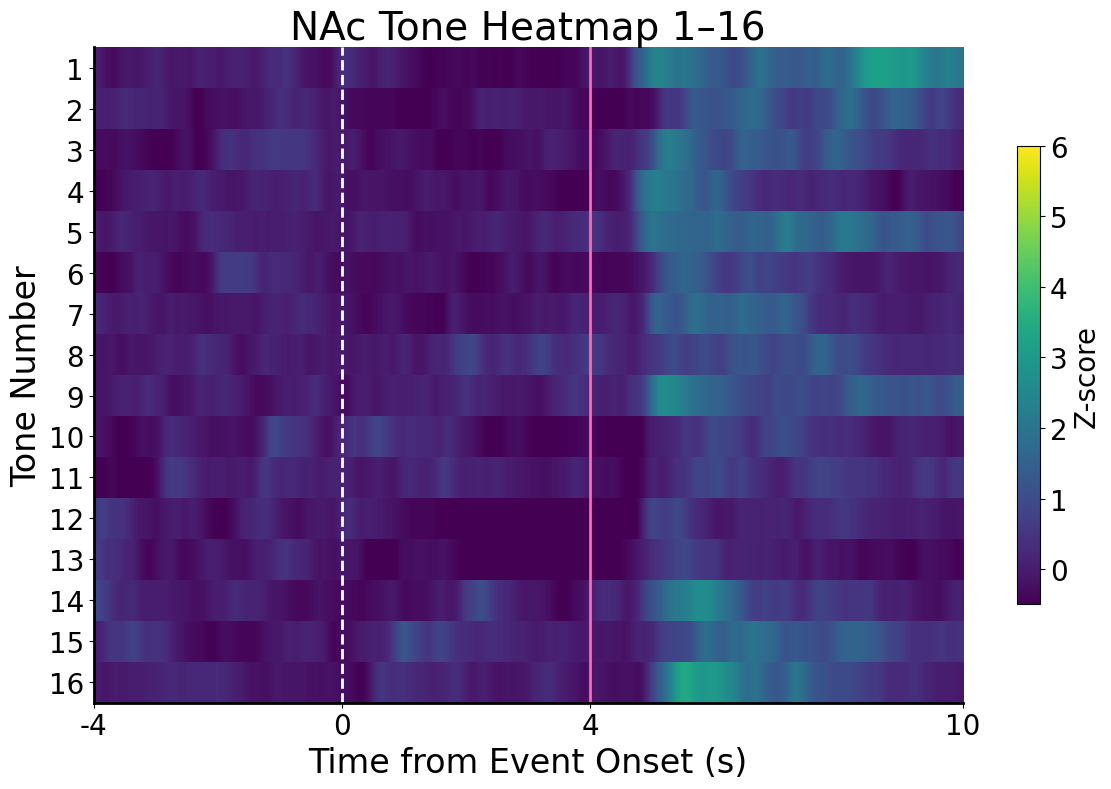

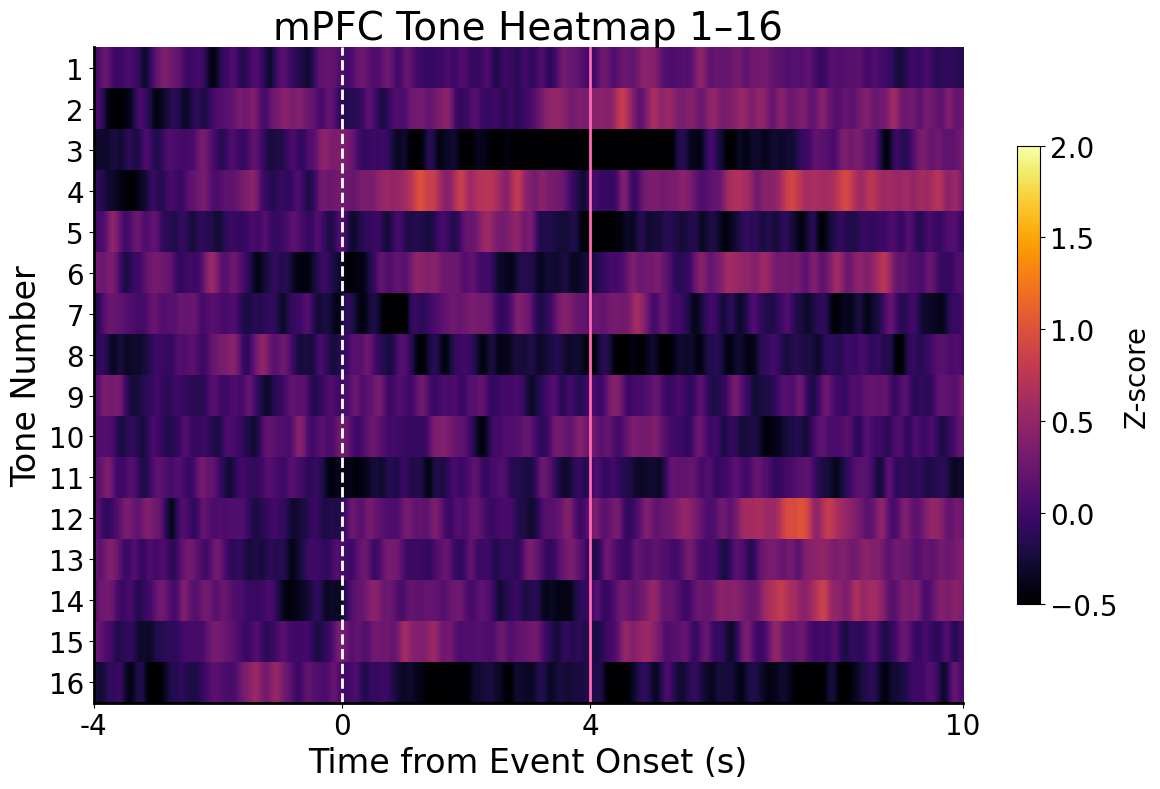

In [10]:
nac_exp.plot_events_heatmap(event_type = 'Tone', 
                             max_events = 16, 
                             directory_path = None, 
                             brain_region = 'NAc', 
                             vmin = -0.5, 
                             vmax = 6, df=None)

mpfc_exp.plot_events_heatmap(event_type = 'Tone', 
                             max_events = 16, 
                             directory_path = None,
                             brain_region = 'mPFC', 
                             vmin = -0.5, 
                             vmax = 2, df=None)

Tone 1 - by subject

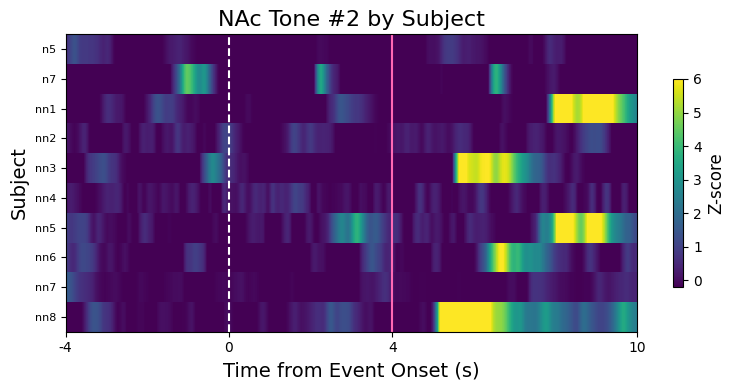

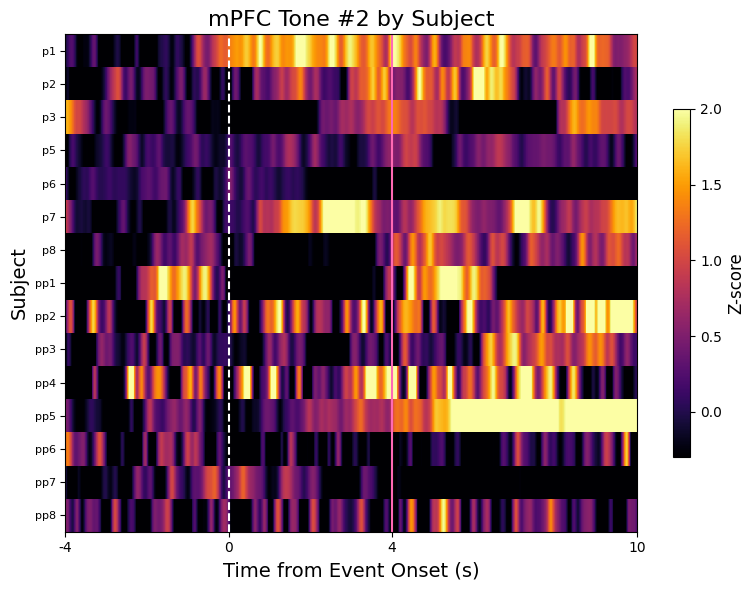

In [11]:
nac_exp.plot_event_subject_heatmap(event_type = 'Tone', 
                             event_index = 1, 
                             directory_path = None, 
                             brain_region = 'NAc', 
                             vmin = -0.2, 
                             vmax = 6, df=None)

mpfc_exp.plot_event_subject_heatmap(event_type = 'Tone', 
                             event_index = 1, 
                             directory_path = None,
                             brain_region = 'mPFC', 
                             vmin = -0.3, 
                             vmax = 2, df=None)

## Plotting both together

## Finding DA metrics

Code to look at a single trial DA response

In [ ]:
# # Select a trial (e.g., the first trial)
# trial = df.iloc[0]

# # Extract the first tone and lick responses (if multiple events exist)
# tone_time = trial['Tone Event_Time_Axis'][0]  # should be -pre_time to post_time
# tone_zscore = trial['Tone Event_Zscore'][0]
# lick_time = trial['Lick Event_Time_Axis'][0]  # should be 0 to post_time
# lick_zscore = trial['Lick Event_Zscore'][0]

# # Plotting both traces
# plt.figure(figsize=(8, 4))
# plt.plot(tone_time, tone_zscore, label='Tone Event (Sound Cue)')
# plt.plot(lick_time, lick_zscore, label='Lick Event')
# plt.axhline(0, color='gray', linestyle='--')
# plt.axvline(0, color='gray', linestyle='--')
# plt.xlabel('Time (s)')
# plt.ylabel('Baseline-corrected z-score')
# plt.title('Tone and Lick DA Responses')
# plt.legend()
# plt.show()


: 